
# BT 3051 - Data structures and algorithms
### Assignment - 4


 [Code submission](https://docs.google.com/forms/d/e/1FAIpQLSdoqjcqpqRyj0-7gBvpz8Eyd4sJQDkvS-o1Cnptp0FAvRoixA/viewform?usp=sf_link)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Q1

In our recent lab session, we applied BFS and DFS algorithms for graph traversal. As an additional task, your assignment is to construct the traversal tree generated by both algorithms. A traversal tree captures the order in which nodes or vertices are visited during the traversal. Were you able to identify all the edges in the original graph as well as in the traversal tree? If not, please provide insights into any missing edges and their implications within the graph. Perform this on the graph as illustrated below.

Starting node: Germany
Traversing order: Alphabetical priority (A-Z)
Your code should return traversal tree(both BFS,DFS) as an object of networkx and vizualize it.


In [2]:
# Below is an implementation of a Queue class.
class Queue:
    # Initiating the list with the argument received at the time of creation of Queue object.
    def __init__(self, ar):
        self.arr = ar
        
    # Checks whether the queue is empty or not.
    def is_empty(self):
        if(len(self.arr) == 0):
            return True
        return False
    
    # Returns the current length of the queue.
    def length(self):
        return len(self.arr)
    
    # Appends an element to the end of the queue.
    def enqueue(self, value):
        self.arr.append(value)
    
    # Pops/Removes the first element of the queue from the list and returns the value to the call point.
    def dequeue(self):
        return self.arr.pop(0)

    # Returns the first element of the queue without removing it from the list.
    def peak(self):
        return self.arr[0]
    
    # Prints the queue(mainly for debugging).
    def __str__(self):
        return str(self.arr)

In [3]:
# Below is an implementation of a Stack class
class Stack:
    # Initiating the list with the argument received at the time of creation of Stack object.
    def __init__(self, ar):
        self.arr = ar
        
    # Checking if the list is empty or not.
    def is_empty(self):
        if(len(self.arr) == 0):
            return True
        return False
    
    # Appends an element to the list.
    def push(self, value):
        self.arr.append(value)
    
    # Removes the topmost element from the list and returns it at the call point.
    def pop(self):
        return self.arr.pop()

    # Returns the topmost element from the list without removing it from the list.
    def peak(self):
        return self.arr[-1]
    
    # Printing the list(mainly for debugging).
    def __str__(self):
        return str(self.arr)

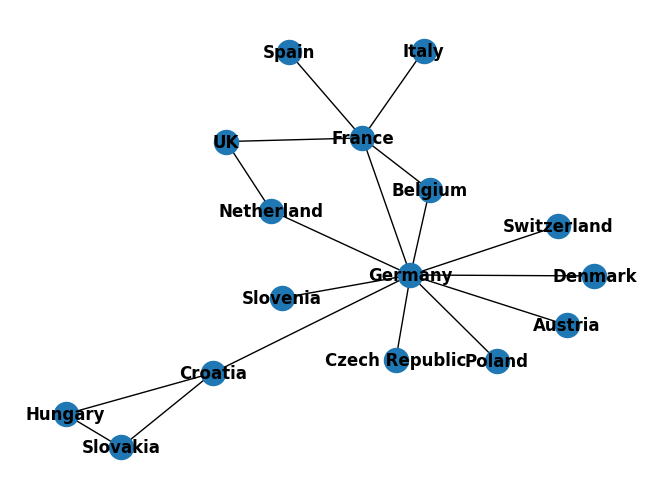

In [4]:
# Creating the input graph in the question
G = nx.Graph()

# Adding all the nodes given in the input graph to the G
G.add_node("Germany")
G.add_edges_from([("Germany","Croatia"),
                 ("Croatia","Hungary"),
                 ("Croatia","Slovakia"),
                 ("Germany","Austria"),
                 ("Germany","Czech Republic"),
                 ("Germany","Denmark"),
                 ("Germany","France"),
                 ("Germany","Netherland"),
                 ("Germany","Poland"),
                 ("Germany","Slovenia"),
                 ("Germany","Switzerland"),
                 ("Germany","Belgium"),
                 ("Hungary","Slovakia"),
                 ("France","Belgium"),
                 ("France","UK"),
                 ("France","Spain"),
                 ("France","Italy"),
                 ("UK","Netherland")
                ])

# Plotting the graph, which is same as the input in the question
nx.draw(G, with_labels=True, font_weight='bold')

In [8]:
def BFS_with_traversal_tree(network, start_node):
    ## Code BFS, visualize traversal tree and return traversal tree as a networkx object.
    
    traversal_tree = nx.Graph()
    # I can add my starting node to the traversal tree
    traversal_tree.add_node(start_node)
    
    # I intialize all nodes in the network as undiscovered (0) at the beginning
    discovered = {node:0 for node in network.nodes}
    # I create a queue which will do the breadth first search
    queue = Queue([])
    # Enqueue the starting node to the queue and change its status to discovered (1)
    queue.enqueue(start_node)
    discovered[start_node] = 1
    # I will keep looking for elements in bfs, till my queue becomes empty
    while(queue.length()!=0):
        # In every iteration, dequeue a node from the queue and make a list of all its neighbours, that are yet undiscovered
        position = queue.dequeue()
        neighbours = []
        for nbrs in network.adj[position]:
            if(discovered[nbrs] == 0):
                # Add the neighoburs of the dequeued node, to traversal tree, as nodes connected to the dequeued node via edge
                traversal_tree.add_node(nbrs)
                traversal_tree.add_edge(position, nbrs)
                neighbours.append(nbrs)
                # When you append a neighbour to list, mark its status as discovered (1)
                discovered[nbrs] = 1
        # sort the neighbours because the traversal is in alphabetical order
        neighbours.sort()
        # Now, enqueue the neighbours into the queue and continue looping
        for i in range(len(neighbours)):
            queue.enqueue(neighbours[i])

    # By the time you exit, you will have the traversal tree for bfs ready
    # Visualize the traversal tree using nx.draw() function
    nx.draw(traversal_tree, with_labels=True, font_weight='bold')
    plt.show()
    
    # Return the traversal tree as a networkx object
    return traversal_tree

def DFS_with_traversal_tree(network, start_node):
    ## Code DFS, visualize traversal tree and return traversal tree as a networkx object.
    
    traversal_tree = nx.Graph()
    # I can add my starting node to the traversal tree
    traversal_tree.add_node(start_node)

    # I intialize all nodes in the network as undiscovered (0) at the beginning
    discovered = {node:0 for node in network.nodes}
    # I create a stack which will do the depth first search
    stack = Stack([])
    # Push the starting node to the stack and change its status to discovered (1)
    stack.push(start_node)
    discovered[start_node] = 1

    # I will keep looking for elements in dfs, till my stack becomes empty
    while not stack.is_empty():
        # In every iteration, look a node from the top of the stack and make a list of all its neighbours, yet undiscovered
        position = stack.peak()
        
        # sort the neighbours in reverse alphabetical order because the traversal is in alphabetical order
        neighbours = []
        for nbrs in network.adj[position]:
            if(discovered[nbrs] == 0):
                neighbours.append(nbrs)
        # Here, the element on top of stack is accessed first, that is why reverse sorting
        neighbours.sort(reverse=True)

        if(len(neighbours) != 0):
            # If neighbour exists, add the first to be explored neighbour to the traversal tree and create an edge
            traversal_tree.add_node(neighbours[-1])
            traversal_tree.add_edge(stack.peak(), neighbours[-1])
            # Add the one neighbour to be explored first to the stack
            stack.push(neighbours[-1])
            # Its discovered status is set to (1) so that in subsequent iterations, we don't have to relook this node
            discovered[neighbours[-1]] = 1

        else:
            # If the given node has no neighbours, pop the node from the stack
            # val is a dummy variable
            val = stack.pop()
            
    # By the time you exit, you will have the traversal tree for dfs ready
    # Visualize the traversal tree using nx.draw() function
    nx.draw(traversal_tree, with_labels=True, font_weight='bold')
    plt.show()

    # Return the traversal tree as a networkx object
    return traversal_tree

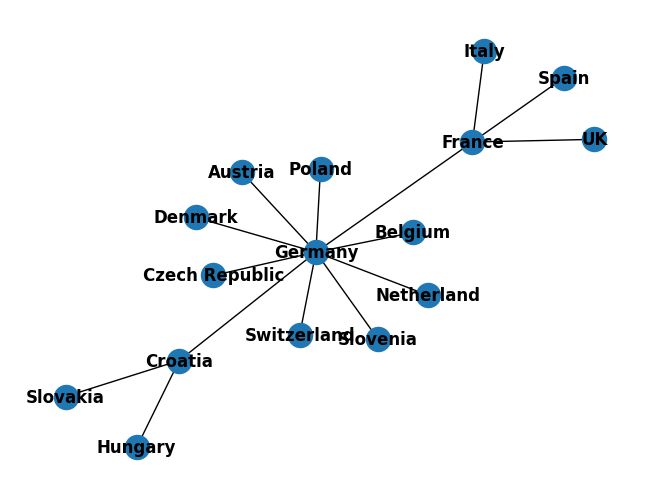

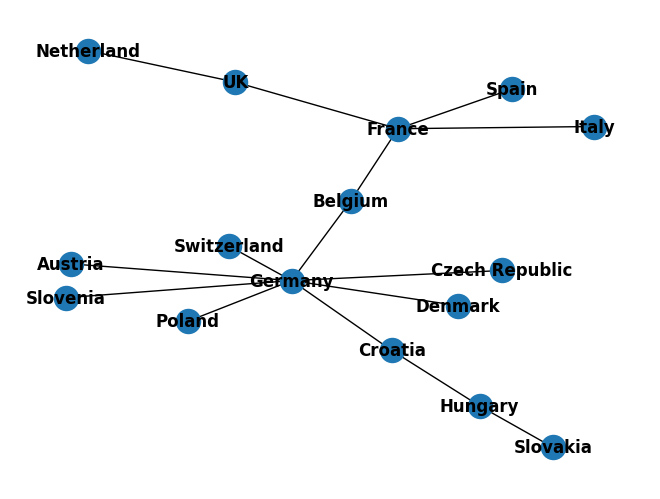

In [9]:
## make the network
## TODO
q1_network = nx.Graph()# build the network

# Adding all the nodes given in the input graph to the q1_network
q1_network.add_node("Germany")
q1_network.add_edges_from([("Germany","Croatia"),
                           ("Croatia","Hungary"),
                           ("Croatia","Slovakia"),
                           ("Germany","Austria"),
                           ("Germany","Czech Republic"),
                           ("Germany","Denmark"),
                           ("Germany","France"),
                           ("Germany","Netherland"),
                           ("Germany","Poland"),
                           ("Germany","Slovenia"),
                           ("Germany","Switzerland"),
                           ("Germany","Belgium"),
                           ("Hungary","Slovakia"),
                           ("France","Belgium"),
                           ("France","UK"),
                           ("France","Spain"),
                           ("France","Italy"),
                           ("UK","Netherland")
                          ])

q1_start_node = "Germany" # replace with starting node

# Call the corresponding function for bfs
BFS_traversal_tree = BFS_with_traversal_tree(q1_network, q1_start_node)

# Call the corresponding function for dfs
DFS_traversal_tree = DFS_with_traversal_tree(q1_network, q1_start_node)

### Q1 Answer

The edges not being present in the traversal tree is an indication of the fact that, the particular edge, not present, was never walked through. The graph was covered using the specific algorithm BFS or DFS, without having to walk through those particular edges.

#### BFS
In BFS, not all edges were identifiable in the original graph as well as traversal graph. The missing graph edges are
1. France - Belgium
2. Netherland - UK
3. Hungary - Slovakia

The BFS algorithm explores the graph one level after the other. So, with repect to the starting point, Germany, both Belgium and France are on the same level. So, the traversal path will visit Belgium owing to alphabetical order. Now before going into the second level, it will have visited France too. This makes both of these nodes already discovered, hence no edge is defined along France - Belgium in the traversal tree.

In the case of Netherland - UK, the traversal will have visited France as well as Netherland in the first level. Now, in the second level, France will first visit UK (owing to alphabetical order), because of which no edge is defined along Netherland - UK in the traversal tree.

In the case of Hungary and Slovakia, both are on the second level with respect to Germany and on the first level with respect to Croatia ( the only point that connects Germany to the above two). Hence owing the first logic, no edge is defined along Hungary - Slovakia in the traversal tree.

#### DFS
In DFS, not all edges were identifiable in the original graph as well as traversal graph. The missing graph edges are
1. France - Germany
2. Netherland - Germany
3. Croatia - Slovakia

The DFS algorithm explores the graph to the extremes of one node before moving on to the other. So, with repect to the starting point, Germany, the traversal path will visit Belgium after which it wil visit France. This makes both Germany and France already discovered, leaving no possibility of edge between France - Germany on the traversal tree.

In the case of Netherland - Germany, the traversal will have visited Belgium, France. Since Netherland lies in the pathline of France, the traversal path would have visited France from there itself. This makes Netherland already discovered, leaving no possibility of edge between Netherland - Germany on the traversal tree.

In the case of Croatia and Slovakia, the traversal tree after visiting Croatia, will move to Hungary (owing to alphabetical order) from where it will move to Slovakia. Thus both Croatia and Slovakia have been discovered, leaving no possibility of edge between Croatia - Slovakia on the traversal tree.

### Q2

Connected components are subsets of a graph in which every node is reachable from every other node in that subset by following edges. These components often represent distinct groups or communities within a graph. Your task is to repurpose Depth-First Search (DFS) or Breadth-First Search (BFS) to determine the number of connected components in any given graph.
Your code should print the number of connected components and return a dictionary with component id as key and list of nodes as values.


In [10]:
# Below is an implementation of a Queue class.
class Queue:
    # Initiating the list with the argument received at the time of creation of Queue object.
    def __init__(self, ar):
        self.arr = ar
        
    # Checks whether the queue is empty or not.
    def is_empty(self):
        if(len(self.arr) == 0):
            return True
        return False
    
    # Returns the current length of the queue.
    def length(self):
        return len(self.arr)
    
    # Appends an element to the end of the queue.
    def enqueue(self, value):
        self.arr.append(value)
    
    # Pops/Removes the first element of the queue from the list and returns the value to the call point.
    def dequeue(self):
        return self.arr.pop(0)

    # Returns the first element of the queue without removing it from the list.
    def peak(self):
        return self.arr[0]
    
    # Prints the queue(mainly for debugging).
    def __str__(self):
        return str(self.arr)

In [11]:
def connected_component_finder(network):
    ## TODO
    # components_dict stores a dictionary of connected components
    components_dict ={}
    # no_of_connected_component counts the number of connected components
    no_of_connected_component = 0
    # Making a list of all the nodes present in the graph
    nodes = list(network.nodes)
    
    # Iterate till you cover all the nodes
    while(len(nodes)!=0):
        # Start with the first node in the list
        start_node = nodes[0]
        # Perform BFS to identify all nodes that can be visited from the taken start node
        curr_list = [start_node]
        # Initially all nodes are undiscovered (0)
        discovered = {node:0 for node in network.nodes}
        # Make a queue and enqueue the start node which has been discovered
        queue = Queue([])
        queue.enqueue(start_node)
        discovered[start_node] = 1
        while(queue.length()!=0):
            # dequeue an element and find its neighbours and enqueue them to the queue
            position = queue.dequeue()
            neighbours = []
            for nbrs in network.adj[position]:
                if(discovered[nbrs] == 0):
                    curr_list.append(nbrs)
                    neighbours.append(nbrs)
                    discovered[nbrs] = 1
            for i in range(len(neighbours)):
                queue.enqueue(neighbours[i])
        # Once you have exhausted the queue, it means you have found a connected component in curr_list
        # Now, remove the elements present in curr_list from the nodes list
        for i in range(len(curr_list)):
            nodes.pop(nodes.index(curr_list[i]))
        # We have obtained one connected component. Add it to the dictionary and increment the counter of connected components
        components_dict[no_of_connected_component] = curr_list
        no_of_connected_component += 1
    
    print('The number of connected component is ',no_of_connected_component)
        
    # Returning the dictionary of connected components    
    return components_dict

In [21]:
## make the network
## TODO
q2_network = nx.Graph()# build the network
q2_network.add_node("J")
q2_network.add_edges_from([("A","B"),
                           ("B","C"),
                           ("C","A"),
                           ("C","H"),
                           ("D","E"),
                           ("E","F"),
                           ("F","D"),
                           ("D","G"),
                           ("G","I"),
                           ("K","L")
                          ])

components_dict = connected_component_finder(q2_network)
components_dict

The number of connected component is  4


{0: ['J'],
 1: ['A', 'B', 'C', 'H'],
 2: ['D', 'E', 'F', 'G', 'I'],
 3: ['K', 'L']}

### Q3
**Emergency Response Planning**

You are responsible for planning emergency response routes for a city. The city is represented as a graph, with intersections as nodes and roads as edges. In the event of an emergency, you need to find the shortest path from a central emergency command center to various locations in the city to minimize response time. The city's road network is represented as an undirected weighted graph, where each road has a known travel time (weight) associated with it. Your task is to find the shortest paths from the central emergency command center **(Node F)** to all other intersections in the city.

Your code should return a nested list of [Source, Target, Duration]. Ex [[F,C,2],....]

In [13]:
# Below is an implementation of a Queue class.
class Queue:
    # Initiating the list with the argument received at the time of creation of Queue object.
    def __init__(self, ar):
        self.arr = ar
        
    # Checks whether the queue is empty or not.
    def is_empty(self):
        if(len(self.arr) == 0):
            return True
        return False
    
    # Returns the current length of the queue.
    def length(self):
        return len(self.arr)
    
    # Appends an element to the end of the queue.
    def enqueue(self, value):
        self.arr.append(value)
    
    # Pops/Removes the first element of the queue from the list and returns the value to the call point.
    def dequeue(self):
        return self.arr.pop(0)

    # Returns the first element of the queue without removing it from the list.
    def peak(self):
        return self.arr[0]
    
    # Prints the queue(mainly for debugging).
    def __str__(self):
        return str(self.arr)

In [17]:
def shortest_path_finder(network,start_node):
    ## TODO
    
    # I can easily assume that the distance between any two nodes will be less than 10000
    # F is 0 because it is the start node
    duration = {node:10000 for node in network.nodes}
    duration[start_node] = 0
    # Start with the starting node to find the minimum duration
    queue = Queue([])
    queue.enqueue(start_node)
    while(queue.length()!=0):
        position = queue.dequeue()
        neighbours = []
        # Find neighbours and check if time from this node to them is smaller than stored.
        # If smaller, update this new time duration
        for nbr in network.adj[position]:
            # q3_network[position][nbr] has the weight of the connection between nbr and position
            time = duration[position] + network[position][nbr]["weight"]
            # If this path is shorter, update the path
            if(time<duration[nbr]):
                duration[nbr] = time

                queue.enqueue(nbr)
    
    # duration now has the minimum duration to reachnode in network from start_node
    # shortest_paths is the nested list of shortest paths from start_node to all nodes
    shortest_paths = []
    # Get the list of all keys(nodes) from the dictionary of time duration
    key_list = list(duration.keys())
    # Iterate through the key_list, to make suitable append to the shortest_paths
    for i in range(len(key_list)):
        shortest_paths.append([start_node,key_list[i],duration[key_list[i]]])
    
    return shortest_paths

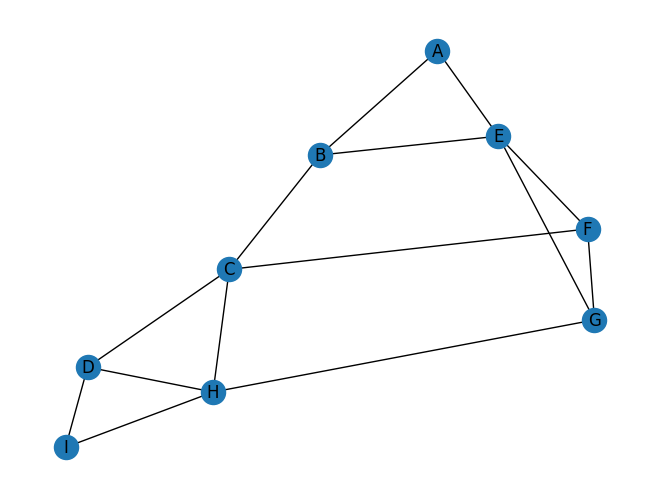

[['F', 'A', 14],
 ['F', 'B', 10],
 ['F', 'F', 0],
 ['F', 'C', 2],
 ['F', 'E', 7],
 ['F', 'G', 6],
 ['F', 'H', 6],
 ['F', 'D', 9],
 ['F', 'I', 16]]

In [18]:
## make the network
## TODO
q3_network = nx.Graph()# build the network
q3_network.add_weighted_edges_from([("A","B",4),
                                    ("F","C",2),
                                    ("A","E",8),
                                    ("B","E",11),
                                    ("E","G",1),
                                    ("B","C",8),
                                    ("F","E",7),
                                    ("F","G",6),
                                    ("G","H",2),
                                    ("C","H",4),
                                    ("C","D",7),
                                    ("D","H",14),
                                    ("D","I",9),
                                    ("I","H",10)
                                   ])

# F is the central emergency command center
start_node = "F"
# Plot to just look at the graph
nx.draw(q3_network, with_labels=True)
plt.show()
# Call the function to find the shortest paths
shortest_path = shortest_path_finder(q3_network,start_node)
shortest_path